In [1]:
import numpy
print(numpy.__version__)

1.17.0


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'theano'

import keras
print(keras.__version__)

import keras.backend as K
K.set_image_data_format("channels_first")

Using Theano backend.
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3

2.3.1


C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\

In [3]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [5]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)

(60000, 28, 28)


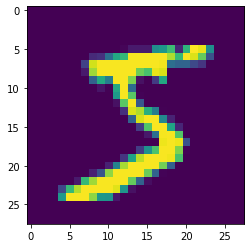

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [8]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [9]:
print(X_train.shape)

(60000, 1, 28, 28)


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
print(y_train.shape)

(10000,)


In [18]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [19]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
print(Y_train.shape)

(60000, 10)


In [23]:
model = Sequential()

In [31]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))

In [30]:
print(model.output_shape)

(None, 32, 20, 20)


In [32]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [33]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [34]:
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
import keras
K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_dim_ordering('tf')

In [50]:
keras.backend.backend()

'theano'

In [51]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


TypeError: Failed to convert object of type <class 'theano.tensor.var.TensorVariable'> to Tensor. Contents: mean. Consider casting elements to a supported type.

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)